In [1]:
import pandas as pd
import matplotlib.pyplot as plt

The list of failed banks is virtually identical to the list of acquired banks. 

In [2]:
df = pd.read_csv(r"https://www.fdic.gov/bank/individual/failed/banklist.csv", encoding = 'unicode_escape', engine ='python')
df.columns = df.columns.str.strip()
df['Closing Date'] = pd.to_datetime(df['Closing Date'], format='%d-%b-%y')
df = df.astype({'Acquiring Institution': str})

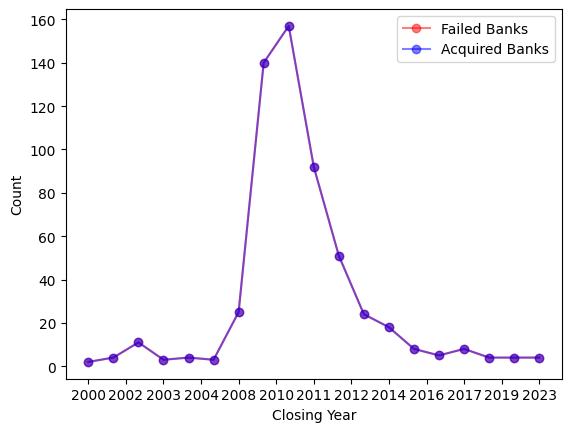

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the DataFrame by year and count the number of failed banks
failed_banks_per_year = df['Closing Date'].dt.year.value_counts().sort_index()
df['Bank Acquisitions'] = df['Acquiring Institution'].where(df['Acquiring Institution'] != "No Acquirer")
# Group the DataFrame by year and count the number of acquisitions
acquisitions_per_year = df[df['Bank Acquisitions'] != 'No Acquirer'].groupby(df['Closing Date'].dt.year).size().sort_index()

fig, ax = plt.subplots()

# Plot the count of failed banks
y = failed_banks_per_year.index.astype(str)
ax.plot(y, failed_banks_per_year, 'ro-', label='Failed Banks', alpha=0.5)
ax.plot(y, acquisitions_per_year, 'bo-', label='Acquired Banks', alpha=0.5)

# Plot the count of acquisitions
#ax.plot_date(acquisitions_per_year.index.astype(str), acquisitions_per_year, 'bo-', label='Acquisitions')

# Set the x-axis tick labels to be rotated for better readability
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=len(failed_banks_per_year.index)))

# Set the labels for the x-axis and y-axis
ax.set_xlabel('Closing Year')
ax.set_ylabel('Count')

# Add a legend
ax.legend()

# Display the plot
plt.show()


Acquiring Banks that failed and were Acquired

In [130]:
acquiring_acquired = df[ df['Acquiring Institution'].str.strip().str.lower().isin( df['Bank Name'].str.strip().str.lower())  ]
acquiring_acquired

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund,Bank Acquisitions
26,The Bank of Georgia,Peachtree City,GA,35259,Fidelity Bank,2015-10-02,10516,Fidelity Bank
32,First National Bank of Crestview,Crestview,FL,17557,First NBC Bank,2015-01-16,10510,First NBC Bank
46,Vantage Point Bank,Horsham,PA,58531,First Choice Bank,2014-02-28,10496,First Choice Bank
78,Heritage Bank of Florida,Lutz,FL,35009,Centennial Bank,2012-11-02,10465,Centennial Bank
96,Security Exchange Bank,Marietta,GA,35299,Fidelity Bank,2012-06-15,10446,Fidelity Bank
98,Waccamaw Bank,Whiteville,NC,34515,First Community Bank,2012-06-08,10444,First Community Bank
99,Farmers' and Traders' State Bank,Shabbona,IL,9257,First State Bank,2012-06-08,10442,First State Bank
105,Plantation Federal Bank,Pawleys Island,SC,32503,First Federal Bank,2012-04-27,10438,First Federal Bank
127,Premier Community Bank of the Emerald Coast,Crestview,FL,58343,Summit Bank,2011-12-16,10415,Summit Bank
128,Central Progressive Bank,Lacombe,LA,19657,First NBC Bank,2011-11-18,10413,First NBC Bank


Top Acquisitions or No Acquisitions

<Axes: xlabel='Acquiring Institution'>

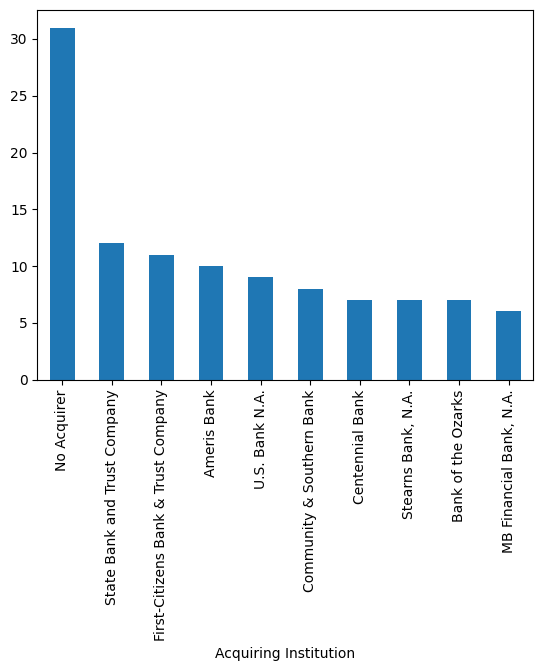

In [127]:
by_acquisitions = df['Acquiring Institution'].value_counts().head(10)

by_acquisitions.plot(kind='bar')

Failures by city

<Axes: xlabel='City'>

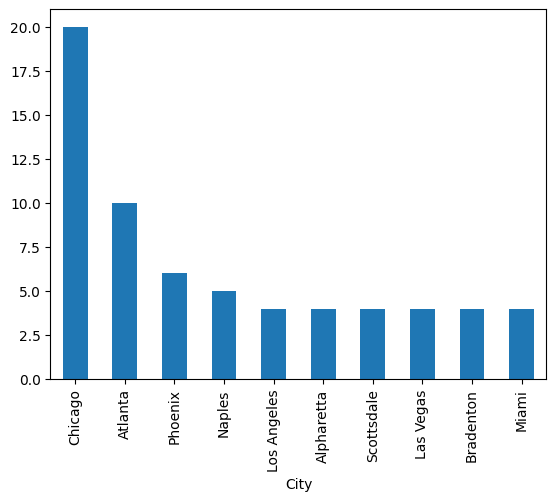

In [128]:
by_city = df['City'].value_counts().head(10)
by_city.plot(kind='bar')

Failures by State

<Axes: xlabel='State'>

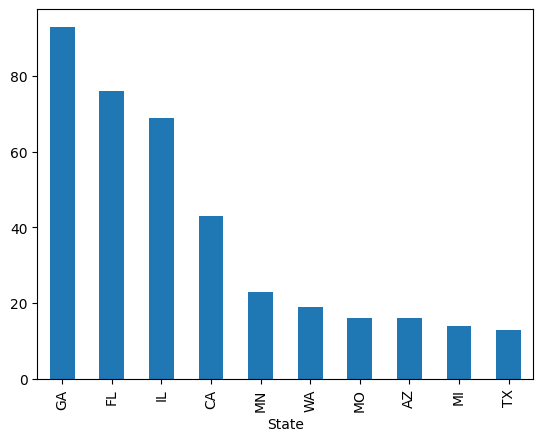

In [129]:
by_state = df['State'].value_counts().head(10)
by_state.plot(kind='bar')